# Custom DataSet For asl Language

In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = 'E:/com vision/asl_alphabet_Dataset_mini' # dataset directory
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'asl_alphabet_train/asl_alphabet_train')# Training dataset directory
TEST_DATA_DIR = os.path.join(DATA_DIR, 'asl_alphabet_test/asl_alphabet_test')# Training dataset directory
#due to low configaration data set i use same data set with low quantity of picture 

# assign a list that contain dataset categories

In [3]:
IMG_SIZE = 224
CATEGORIES = [] 

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)#
    
print(CATEGORIES)

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# display 1 picture for each category

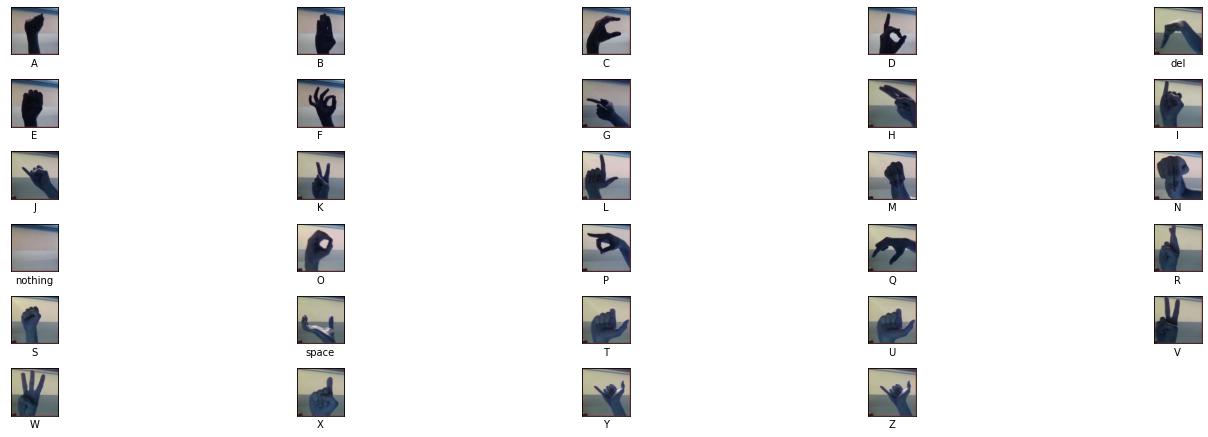

In [11]:

plt.figure(figsize=(20,10))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,5,i+1)
        plt.imshow(img_array)
        plt.xlabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        break

plt.tight_layout()        
plt.show()

# convert pictures and keep into training array

In [ ]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) # 'E:/com vision/asl_alphabet_Dataset_mini/asl_alphabet_train/asl_alphabet_train'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass
        
print(len(training_data))

# same as train image convert image keep it in a array 

In [6]:
test_data = []


path =TEST_DATA_DIR 
class_num = CATEGORIES.index(c) 
for img in tqdm(os.listdir(path)):
    try:
        img_array = cv2.imread(os.path.join(path, img))
        img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
        test_data.append([img_resized, class_num])
    except WException as e:
        pass
        
print(len(test_data))

100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 410.65it/s]

28


# shuffle the training data and test data

In [7]:
random.shuffle(training_data)
random.shuffle(test_data)

# convert the test data to a numpy array and reshape the image 

In [8]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (28, 224, 224, 3) Y_test= (28,)


# same as test data train data store in the array after reshaping and converting it to numpy array

In [9]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,224,224,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (5800, 224, 224, 3) Y_train= (5800,)


# after converting test and tain array to numpy array save it as a pickle file bellow path

In [10]:
pickle_out = open("E:/com vision/aslalphabet/X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("E:/com vision/aslalphabet/Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open("E:/com vision/aslalphabet/X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("E:/com vision/aslalphabet/Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()